# **Importing Libraries**

In [ ]:
import numpy as np
# NumPy is a fundamental package for scientific computing in Python. It provides support for arrays,
# matrices, and a large library of mathematical functions to operate on these data structures.

import pandas as pd
# Pandas is a library providing high-performance, easy-to-use data structures, and data analysis tools for Python.
# It's widely used for data manipulation and analysis.

import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib is a plotting library for Python and its numerical mathematics extension, NumPy.
# Seaborn is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics.

from sklearn.model_selection import train_test_split
# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets:
# for training data and for testing data. With this function, you don't need to divide the dataset manually.

from sklearn.preprocessing import StandardScaler
# StandardScaler is a tool in sklearn.preprocessing to standardize features by removing the mean and scaling to unit variance.
# This is often a good practice, especially for algorithms such as SVM and K-nearest neighbors.

from sklearn.decomposition import PCA
# PCA (Principal Component Analysis) from sklearn.decomposition is a statistical procedure that uses an orthogonal transformation
# to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables.

from sklearn.model_selection import RandomizedSearchCV
# RandomizedSearchCV is a method for fitting and comparing different models and hyperparameters.
# It's part of the sklearn.model_selection module, allowing randomized search over specified parameter values for an estimator.
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for classification tasks
from sklearn.svm import SVC

# SVC (Support Vector Classifier) is used for similar purposes but can also handle non-linear data.

from sklearn.metrics import classification_report, confusion_matrix
# These functions from sklearn.metrics are used for evaluating the quality of predictions from a classification algorithm.
# classification_report shows the main classification metrics on a per-class basis. confusion_matrix is a table used to describe the performance of a classification model.

import warnings
# This module provides a way to manage warning messages in Python.

warnings.filterwarnings("ignore", message="The total space of parameters .*")
# This line is used to ignore specific warnings that match the given message.
# In this case, warnings related to the total space of parameters in RandomizedSearchCV are ignored.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load The Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Work/H /breast-cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Worldwide, breast cancer is the most frequent cancer to affect women. It affects about 2.1 million people in 2015 alone and makes up 25% of all cancer cases. It all begins when breast cells start to proliferate uncontrollably. Usually, these cells develop into tumors that are felt as lumps in the breast area or that are visible on X-rays.

The main obstacle to its discovery is determining whether a tumor is benign (not cancerous) or malignant (cancerous). Please finish the analysis of the Breast Cancer Wisconsin (Diagnostic) Dataset and machine learning (using SVMs) to classify these tumors.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset includes a variety of features related to breast cancer tumors, collected for the purpose of distinguishing between **malignant (cancerous)** and **benign (non-cancerous)** tumors. Here's a brief introduction to the columns:

**id:** A unique identifier for each observation.

**diagnosis:** The classification of the tumor, with 'M' indicating malignant and 'B' benign.

radius_mean: The average distance from the center to the perimeter of the tumor.

**texture_mean:** The standard deviation of grayscale values in the tumor tissue, indicating texture.
perimeter_mean: The average size of the tumor's perimeter.

**area_mean:** The average area of the tumor.

**smoothness_mean:** A measure of the smoothness of the tumor's surface.

**compactness_mean:** A measure of the compactness of the tumor (perimeter^2 / area - 1.0).

**concavity_mean:** The severity of concave portions of the contour.

**concave points_mean:** The number of concave portions of the contour.

**symmetry_mean**: The symmetry of the tumor.
fractal_dimension_mean: A measure of the "coastline approximation" - 1 (complexity of the tumor shape).

**radius_se:** The standard error of the radius measurements.

**texture_se:** The standard error for texture measurements.

**perimeter_se:** The standard error for perimeter measurements.

**area_se:** The standard error for area measurements.

**smoothness_se:** The standard error for smoothness measurements.

**compactness_se:** The standard error for compactness measurements.

**concavity_se:** The standard error for concavity measurements.

**concave points_se:** The standard error for the number of concave points.

**symmetry_se:** The standard error for symmetry measurements.

**fractal_dimension_se:** The standard error for fractal dimension measurements.

**radius_worst:** The "worst" or largest mean value for the radius (mean of the three largest values).

**texture_worst:** The "worst" or largest mean value for texture.

**perimeter_worst:** The "worst" or largest mean value for the perimeter.

**area_worst:** The "worst" or largest mean value for area.

**smoothness_worst:** The "worst" or largest mean value for smoothness.

**compactness_worst:** The "worst" or largest mean value for compactness.

**concavity_worst:** The "worst" or largest mean value for concavity.

**concave points_worst:** The "worst" or largest mean value for the number of concave points.

**symmetry_worst:** The "worst" or largest mean value for symmetry.

**fractal_dimension_worst:** The "worst" or largest mean value for fractal dimension.

These features are calculated from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image, providing valuable information for diagnosing breast cancer.

In [ ]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.3,r=.9", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


# Data Visualization and Analysis

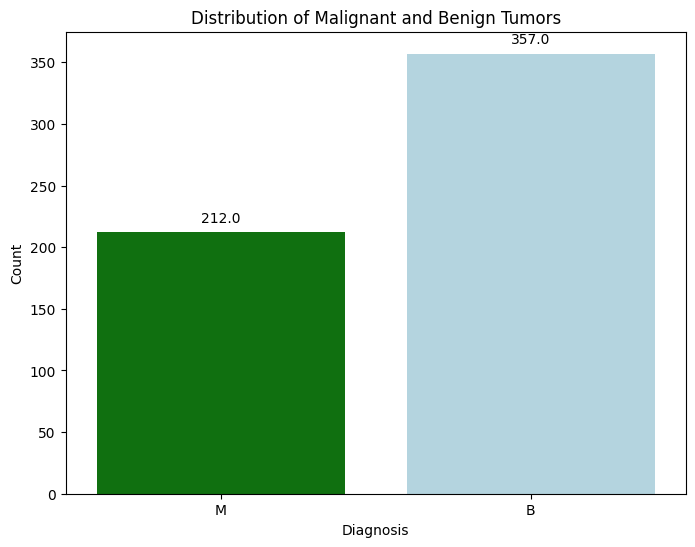

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette=['green', 'lightblue'])  # Using green and light blue for the palette
plt.title('Distribution of Malignant and Benign Tumors')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Adding count annotations to each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The dataset illustrates the frequency of benign conditions in breast cancer screenings, including 357 benign and 212 malignant tumors. This distribution emphasizes how crucial good diagnosis is to preventing pointless procedures. It highlights the necessity of giving careful thought to class imbalance in machine learning models as well as the significance of metrics other than accuracy, like recall and precision. This research emphasizes the crucial distinction between benign and malignant tumors for appropriate medical intervention, which helps in the development of diagnostic instruments and teaching resources.

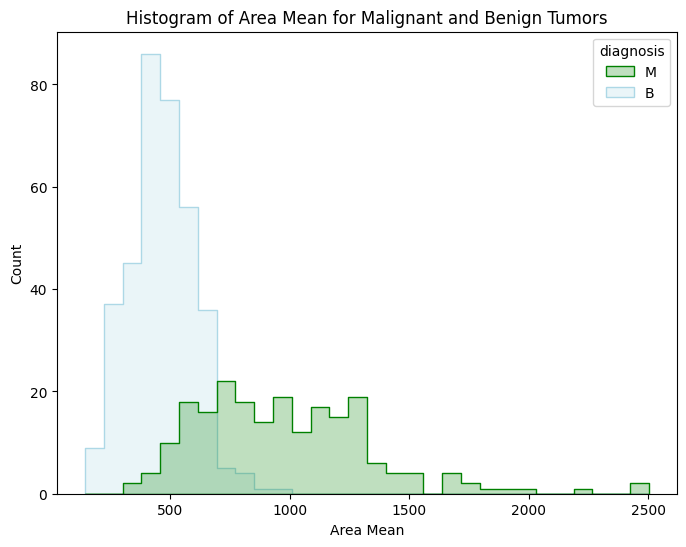

In [ ]:
plt.figure(figsize=(8, 6))

# Creating a histogram for 'area_mean' with separation based on 'diagnosis'
sns.histplot(data=df, x='area_mean', hue='diagnosis', element='step', palette=['green', 'lightblue'], bins=30)

plt.title('Histogram of Area Mean for Malignant and Benign Tumors')
plt.xlabel('Area Mean')
plt.ylabel('Count')
plt.show()

The histogram shows different patterns for each diagnosis by displaying the area_mean distribution for malignant (M) and benign (B) tumors. A bigger area_mean is typically found in malignant tumors, as shown by the histogram's stretching to the right. Benign tumors cluster on the left of the plot and are more common, with a smaller area_mean. The overlap region shows that certain benign tumors may have regions that resemble those of malignant ones, emphasizing the difficulty in making a diagnosis and the requirement for thorough examination.

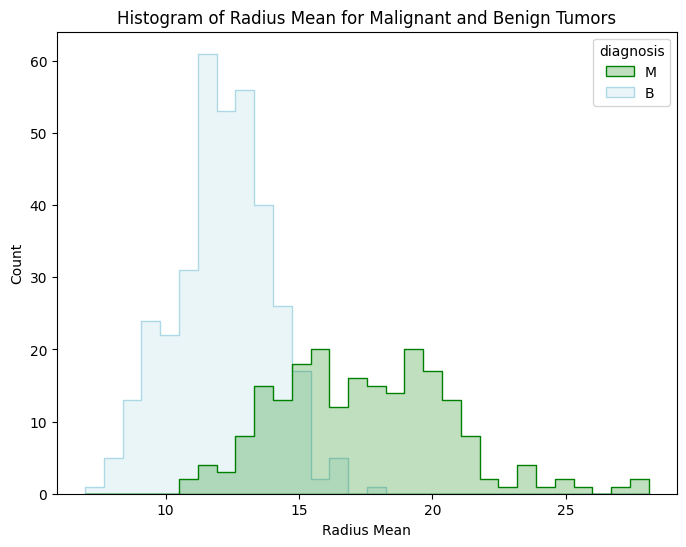

In [ ]:
plt.figure(figsize=(8, 6))

# Creating a histogram for 'radius_mean' with separation based on 'diagnosis'
sns.histplot(data=df, x='radius_mean', hue='diagnosis', element='step', palette=['green', 'lightblue'], bins=30)

plt.title('Histogram of Radius Mean for Malignant and Benign Tumors')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

The radius_mean feature in the histogram displays two different distributions: one for benign tumors (B) and one for malignant tumors (M). Malignant tumors tend to have bigger radii, as seen by the skew in their distribution towards larger values of radius_mean. The pink-colored benign tumors exhibit a concentration of smaller values, indicating a tendency for benign tumors to have a lower radius. Since there is little overlap between the two distributions, radius_mean may be a useful tool for differentiating between benign and malignant tumors.

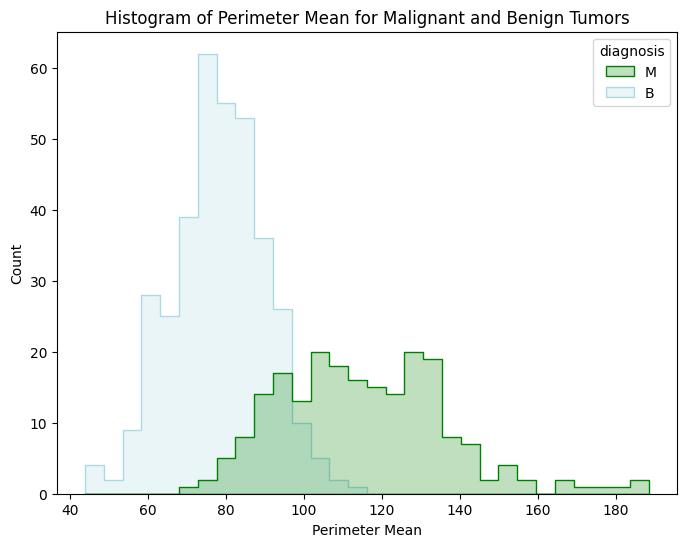

In [ ]:
plt.figure(figsize=(8, 6))

# Creating a histogram for 'perimeter_mean' with separation based on 'diagnosis'
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis', element='step', palette=['green', 'lightblue'], bins=30)

plt.title('Histogram of Perimeter Mean for Malignant and Benign Tumors')
plt.xlabel('Perimeter Mean')
plt.ylabel('Count')
plt.show()

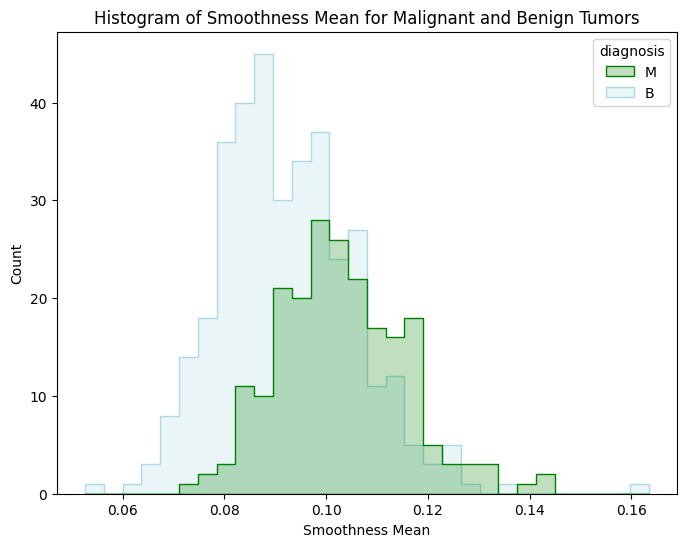

In [ ]:
plt.figure(figsize=(8, 6))

# Creating a histogram for 'smoothness_mean' with separation based on 'diagnosis'
sns.histplot(data=df, x='smoothness_mean', hue='diagnosis', element='step', palette=['green', 'lightblue'], bins=30)

plt.title('Histogram of Smoothness Mean for Malignant and Benign Tumors')
plt.xlabel('Smoothness Mean')
plt.ylabel('Count')
plt.show()

In [ ]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

**Looking for Correlation among features**

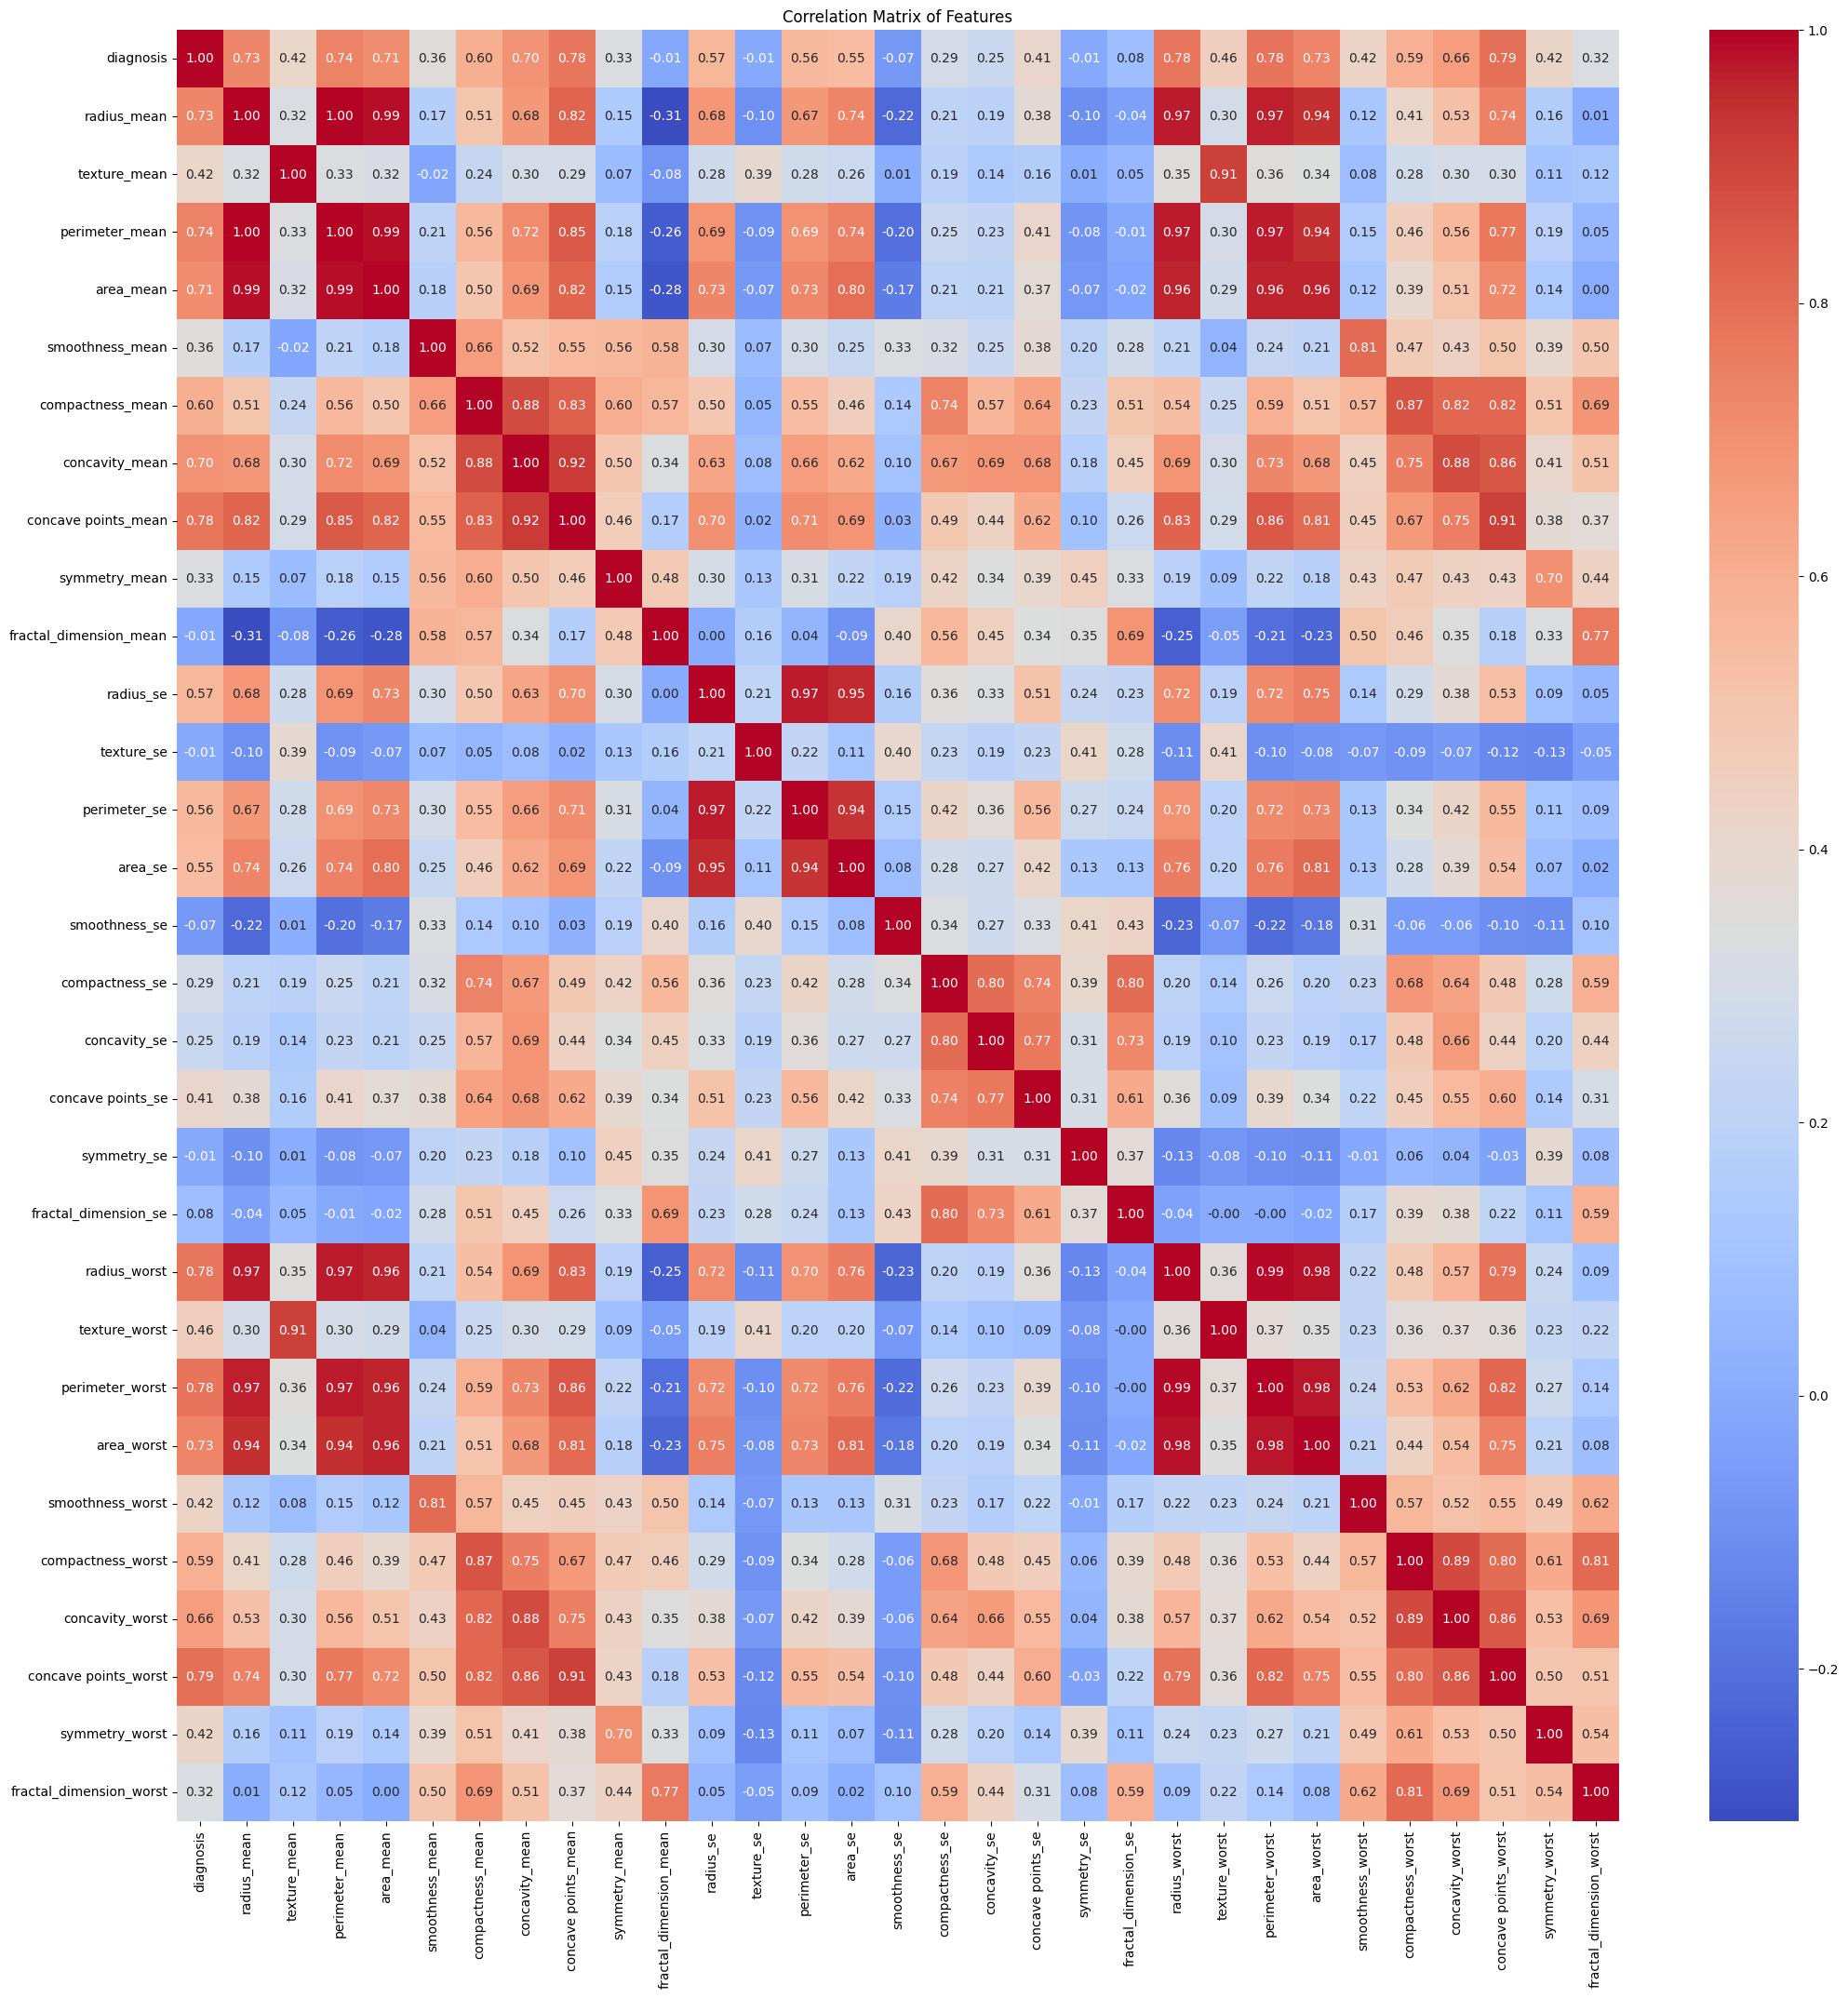

In [ ]:
# Calculating the correlation matrix
corr = df.drop('id', axis=1).corr()

# Setting up the matplotlib figure
plt.figure(figsize=(25, 25))

# Drawing the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

# Displaying the plot with a title
plt.title('Correlation Matrix of Features')
plt.show()

The relationships between the different features in the dataset are displayed in this correlation matrix visualization. The degree of correlation is indicated by the color: red indicates a positive correlation, blue indicates a negative correlation, and white indicates no correlation. Strong positive correlations between features like radius_mean, perimeter_mean, and area_mean suggest that as one measurement rises, the others typically do too. Given the geometric relationship between these qualities, this is predictable.

The diagnosis column shows positive correlations with features like radius_worst, perimeter_worst, area_worst, and concavity_worst, suggesting these features could be significant indicators of malignancy. In contrast, features like texture_se and symmetry_se have very little correlation with diagnosis, indicating they may be less useful for predicting the presence of cancer.

Interestingly, fractal_dimension_mean shows only slight correlation with diagnosis and other features, which may imply it has a unique property not linearly related to the size or shape of the tumors. The heatmap also indicates potential multicollinearity between certain features, which could affect the performance of certain machine learning models, especially those that assume feature independence like logistic regression. For machine learning purposes, one might consider reducing dimensionality through methods like Principal Component Analysis (PCA) to address multicollinearity and improve model interpretability.

# **Feature Importance**

In [ ]:
# Separate features and target variable
X = df.drop(['id', 'diagnosis'], axis=1)  # Assuming 'id' is not a relevant feature
y = df['diagnosis']

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Extract feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

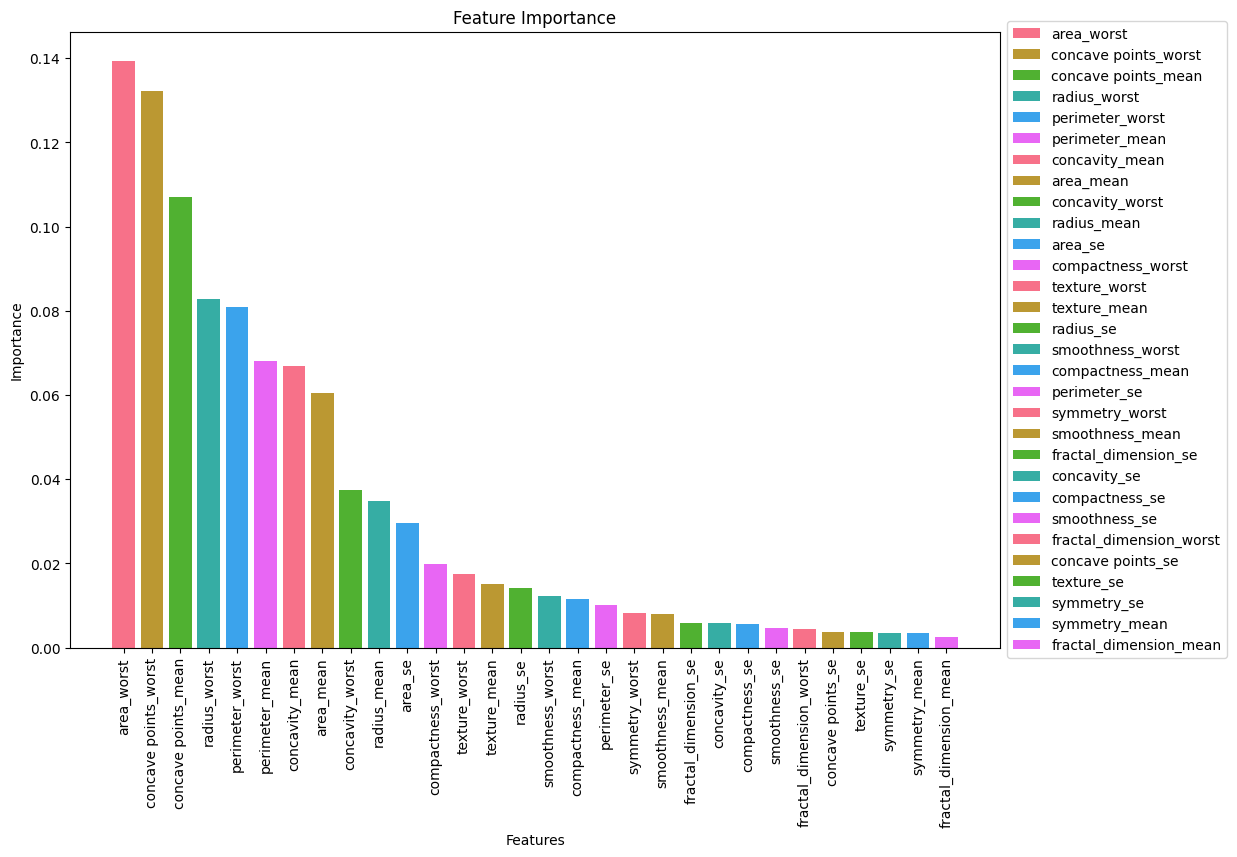

In [ ]:
# Use seaborn color palette for the plot
sns.set_palette("husl")

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")

# Create bars with different colors for each feature
bars = []
for i in range(X.shape[1]):
    color = sns.color_palette()[i % len(sns.color_palette())]  # Cycle through seaborn color palette
    bar = plt.bar(i, feature_importances[indices[i]], align='center', color=color)
    bars.append(bar)

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')

# Adding a legend for features on the right side of the plot
plt.legend(bars, X.columns[indices], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**We will choose the Top 6 Features for the Model Training**

In [ ]:
# Select the top 6 features
top_features_indices = indices[:6]
X_top6 = X.iloc[:, top_features_indices]

# **Spliting and Scaling Data**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top6, y, test_size=0.2, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit it to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Training**

**Defining the Paramters**

In [ ]:
# Define hyperparameter grids for each classifier
svm_params = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    # Parameters below are relevant when kernel is 'poly'
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

In [ ]:
# Create a dictionary with classifier and its corresponding hyperparameter grids
classifier = {
    'SVM': (SVC(), svm_params)
}

In [ ]:
best_scores = {}  # Dictionary to store the best scores of each algorithm
best_estimators = {}

# Perform RandomizedSearchCV for each classifier
for name, (classifier, params) in classifier.items():
    clf_random = RandomizedSearchCV(estimator=classifier, param_distributions=params, n_iter=50, cv=5, scoring='accuracy', random_state=42)
    clf_random.fit(X_train_scaled, y_train)

    print(f"Best parameters for {name}: {clf_random.best_params_}")
    print(f"Best cross-validation score for {name}: {clf_random.best_score_:.4f}")
    print('\n')

    # Store the best score for each algorithm
    best_scores[name] = clf_random.best_score_
    best_estimators[name] = clf_random.best_estimator_

# Print and save the accuracy of the best model from each algorithm
for name, score in best_scores.items():
    print(f"Best cross-validation score for {name}: {score:.4f}")

results_df = pd.DataFrame(clf_random.cv_results_)
print(results_df[['params', 'mean_test_score', 'std_test_score']].head(50))

Best parameters for SVM: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, 'coef0': 0.0, 'C': 10}
Best cross-validation score for SVM: 0.9582


Best cross-validation score for SVM: 0.9582
                                               params  mean_test_score  \
0   {'kernel': 'poly', 'gamma': 'auto', 'degree': ...         0.892308   
1   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 4, '...         0.953846   
2   {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'co...         0.953846   
3   {'kernel': 'rbf', 'gamma': 'auto', 'degree': 5...         0.942857   
4   {'kernel': 'linear', 'gamma': 'auto', 'degree'...         0.947253   
5   {'kernel': 'rbf', 'gamma': 0.1, 'degree': 5, '...         0.958242   
6   {'kernel': 'poly', 'gamma': 'auto', 'degree': ...         0.786813   
7   {'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'co...         0.953846   
8   {'kernel': 'rbf', 'gamma': 0.01, 'degree': 3, ...         0.949451   
9   {'kernel': 'poly', 'gamma': 0.001, 'degree': 4...         0.751648   
10 

# **Evaluating the Model on Test Set**

In [ ]:
# Evaluate each best estimator on the test set
for name, estimator in best_estimators.items():
    # Predict on the test set
    y_pred = estimator.predict(X_test_scaled)

    # Calculate confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    print(f"Evaluation for {name}:")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print('\n')

Evaluation for SVM:
Confusion Matrix:
[[70  1]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



